**Лабораторная работа 6**

---


**Методы обучения без учителя**

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets
from warnings import simplefilter

simplefilter('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving phones.csv to phones.csv


Используме датасет с данными о характеристиках телефонов.

In [4]:
df = pd.read_csv('./phones.csv', sep=',')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [17]:
y = df['price_range']
d1 = df.drop('price_range', axis=1)

In [18]:
d1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


**Снижение размерности методом главных компонент**

In [19]:
pca = PCA(n_components=2)
d2 = pca.fit_transform(d1)
print('Доля объясненной дисперсии: {}, сумма={}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))
d2[:10]

Доля объясненной дисперсии: [0.67043941 0.16517913], сумма=0.835618540247093


array([[  430.5970944 ,  -795.78823104],
       [  504.9847354 ,   696.62236757],
       [  473.32982793,   763.94213631],
       [  639.82232403,   779.69118008],
       [ -718.98518373,   382.3045253 ],
       [-1060.55021237,   536.9147655 ],
       [ 1097.9092356 ,  -339.09227339],
       [-1423.18202636,  -168.94999276],
       [-1023.05944259,  -478.52359007],
       [-1615.78422126,   319.60956949]])

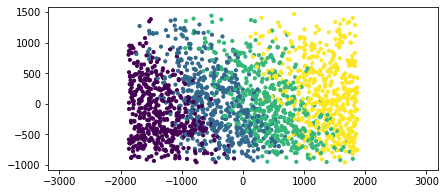

In [9]:
plt.figure(figsize=(7,3))
plt.scatter(d2[:, 0], d2[:, 1], s=10, c=y)
plt.axis('equal')
plt.show()


**Снижение размерности алгоритмом t-SNE**

In [10]:
tsne = TSNE(n_components=2)
d3 = tsne.fit_transform(d1)
d3[:10]

array([[ -2.9789503 ,  20.40642   ],
       [ 24.902267  , -12.104885  ],
       [ 30.205442  , -14.710521  ],
       [ 31.505564  , -13.563473  ],
       [ -0.36961195, -30.866777  ],
       [ -2.1633003 , -37.338978  ],
       [ 30.31816   ,  24.549704  ],
       [-41.229347  , -26.83013   ],
       [-39.356792  ,  -6.2831497 ],
       [-22.073355  , -46.58606   ]], dtype=float32)

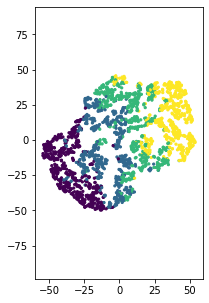

In [11]:
plt.figure(figsize=(3,5))
plt.scatter(d3[:, 0], d3[:, 1], s=5, c=y)
plt.axis('equal')
plt.show()

Метод главных компонент выделил кластеры четче

**Кластеризация**

In [20]:
d1 = np.array(d1)

In [21]:
all_dt = {'d1':d1, 'd2':d2, 'd3':d3}

In [14]:
#функция для метрик и визуализации
def claster_metrics(method, cluster_datasets, true_y, draw):
    dt =[]
    ari = []
    ami = []
    hl = []
    cl = []
    vl = []
    sl = []
    for name, dts in cluster_datasets.items():
        temp_cluster = method.fit_predict(dts.data)
        if (name == 'd2' or name == 'd3'):
          if (draw):
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
            ax1.set_title('Предсказания ' + name)
            ax1.scatter(dts[:,0], dts[:,1], c=method.labels_)
            ax2.set_title('Реальные значения')
            ax2.scatter(dts[:,0], dts[:,1], c=true_y);
        dt.append(name)
        ari.append(adjusted_rand_score(true_y, temp_cluster))
        ami.append(adjusted_mutual_info_score(true_y, temp_cluster))
    
        h, c, v = homogeneity_completeness_v_measure(true_y, temp_cluster)
        hl.append(h)
        cl.append(c)
        vl.append(v)
    
        try:
            sscore = silhouette_score(dts.data, temp_cluster)
        except:
            sscore = None
            
        sl.append(sscore)
    
    result = pd.DataFrame({'Datasets':dt, 
                           'ARI':ari, 'AMI':ami, 
                           'Homogeneity':hl, 
                           'Completeness':cl, 
                           'V-measure':vl, 'Silhouette':sl})
    return result

**1. Метод k-средних**

Подборем гиперпараметр количества классов

In [15]:
def choose_param(ds):
  inertia = []
  TEMP_X = ds
  for k in range(1, 15):
      kmeans = KMeans(n_clusters=k, random_state=1).fit(TEMP_X)
      inertia.append(np.sqrt(kmeans.inertia_))
  plt.plot(range(1, 15), inertia, marker='s');
  plt.xlabel('$k$')
  plt.ylabel('$J(C_k)$')

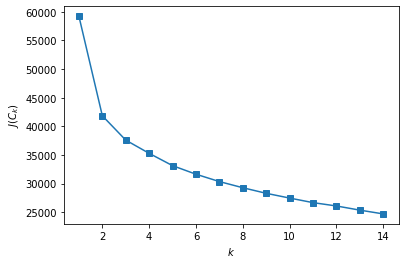

In [16]:
choose_param(d1.data)

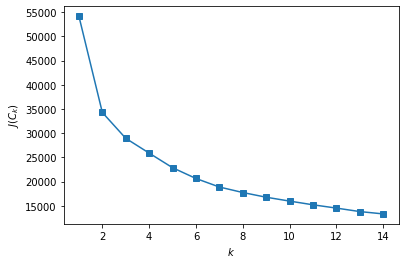

In [13]:
choose_param(d2.data)

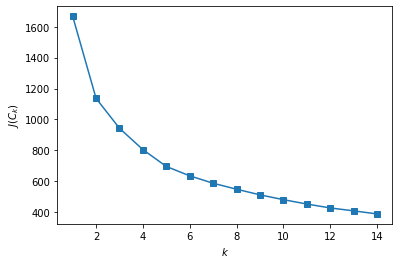

In [22]:
choose_param(d3.data)

Явно выраженного локтя нет, выберем значение параметра, равное 5

In [23]:
n_clusters = 5

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,d1,0.393046,0.480060,0.516164,0.450517,0.481111,0.245704
1,d2,0.375391,0.471370,0.508105,0.441448,0.472437,0.376007
2,d3,0.302835,0.401181,0.433781,0.375230,0.402386,0.406189


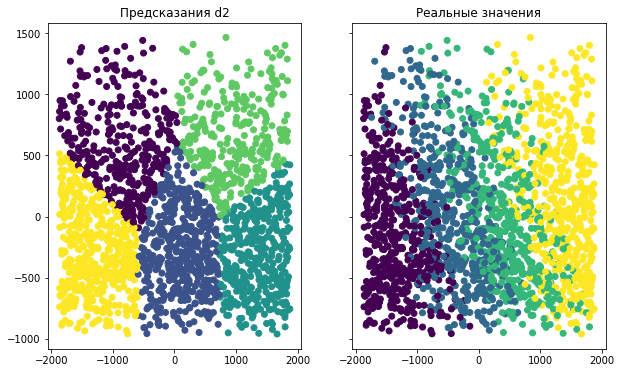

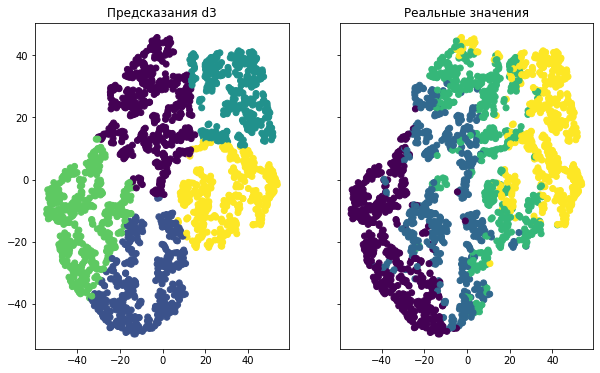

In [24]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
claster_metrics(kmeans, all_dt, y, 1)

**2. Иерархическая кластеризация**

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,d1,0.340559,0.386419,0.412979,0.365281,0.387669,0.183877
1,d2,0.290764,0.419375,0.451895,0.393266,0.420547,0.312219
2,d3,0.431732,0.492829,0.529562,0.462659,0.493855,0.351481


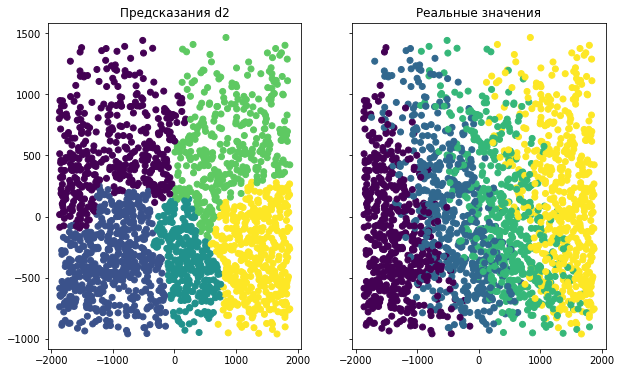

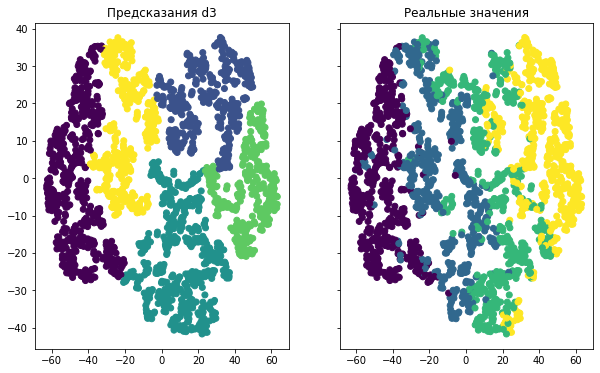

In [17]:
aggl_cl = AgglomerativeClustering(n_clusters=n_clusters)
claster_metrics(aggl_cl, all_dt, y, 1)

**3. Affinity Propagation**

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,d1,0.062327,0.372448,0.777045,0.255435,0.384481,0.194871
1,d2,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
2,d3,0.000000,0.000000,0.000000,1.000000,0.000000,NaN


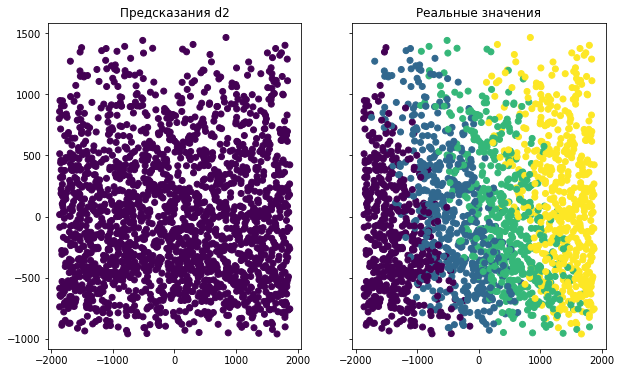

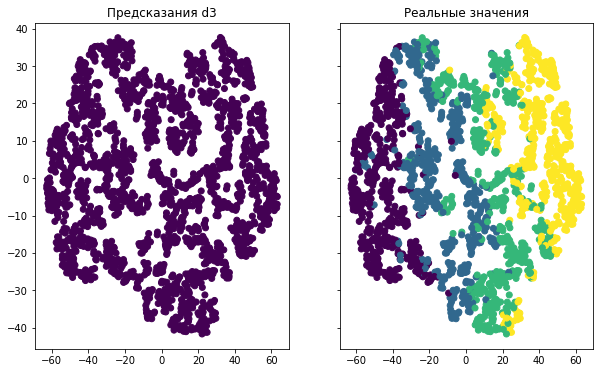

In [18]:
propag = AffinityPropagation()
claster_metrics(propag, all_dt, y, 1)

Не удалось выделить кластеры для датасетов d2, d3.

**4. Mean Shift**

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,d1,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
1,d2,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
2,d3,0.304145,0.387798,0.290013,0.587094,0.388242,0.472577


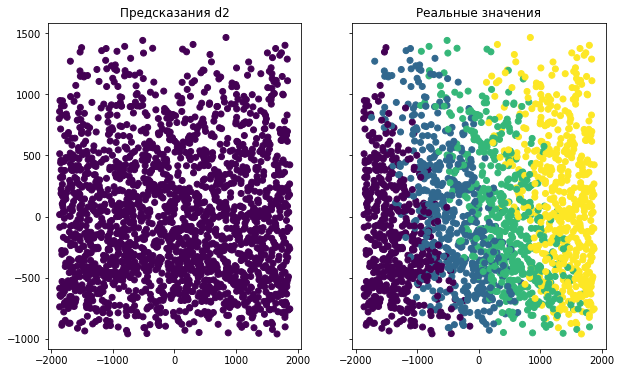

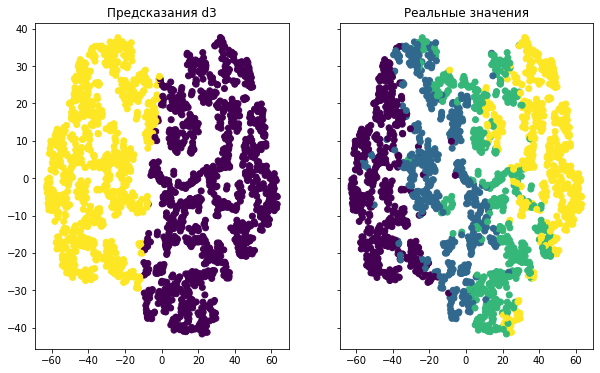

In [19]:
mean_sh = MeanShift()
claster_metrics(mean_sh, all_dt, y, 1);

Не удалось выделить кластеры для датасетов d1, d2.

**6. Алгоритм BIRCH**

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,d1,0.383784,0.443346,0.395525,0.506077,0.444024,0.245916
1,d2,0.403256,0.495127,0.427713,0.589559,0.495761,0.286883
2,d3,0.378251,0.428335,0.381595,0.489937,0.429032,0.416787


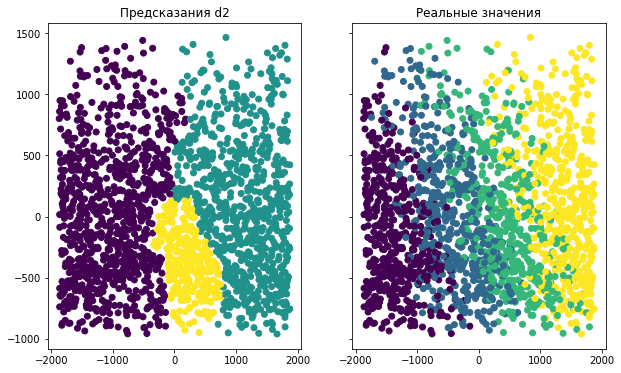

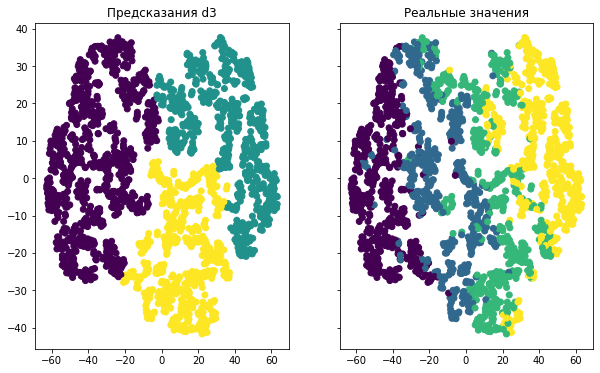

In [21]:
birch = Birch()
claster_metrics(birch, all_dt, y, 1)

**7. Gaussian Mixture**

In [23]:
gauss =  GaussianMixture(n_components=3)
claster_metrics(gauss, all_dt, y, 0)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,d1,0.015310,0.087284,0.066927,0.131019,0.088597,-0.131271
1,d2,0.452809,0.514936,0.461191,0.584368,0.515523,0.389582
2,d3,0.390923,0.447211,0.396684,0.514267,0.447887,0.429418


**Вывод**

Для датасета d1 лучшей моделью оказался метод k-средних при гиперпараметре 5. 

Для датасета d2 лучшей моделью оказался метод Gaussian Mixture. Здесь же оказались лучшие значения метрик ARI и AMI - 0,45 и 0,51. 

Для датасета d2 лучшей моделью оказался метод Иерархической кластеризации. 

